In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

from skimage.io import imread
from skimage.transform import resize
from skimage.util import img_as_int

from keras.preprocessing.image import load_img

In [2]:
from dataset import Dataset
import os

root_path = './'
train_val_path = os.path.join(root_path, 'VOCtrainval_06-Nov-2007', 'VOCdevkit', 'VOC2007')
test_path = os.path.join('VOCtest_06-Nov-2007', 'VOCdevkit', 'VOC2007')

dataset = Dataset(train_val_path, test_path, 255)

In [3]:
train_data, val_data, segmentation_data = dataset.generate_train_val_split()

print(f'Train length: {len(train_data)}')
print(f'Validation length: {len(val_data)}')
print(f'Segmentation length: {len(segmentation_data)}')

Train length: 4110
Validation length: 901
Segmentation length: 422


In [2]:
test_data = dataset.get_test_data()

print(f'Test length: {len(test_data)}')

Test length: 4952


In [19]:
image_data = train_data[0]
image = image_data['image']
name = image_data['name']
boxes = image_data['boxes']

segmentation = segmentation_data[0]
seg_image = segmentation['segmentation']
seg_boxes = segmentation['boxes']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


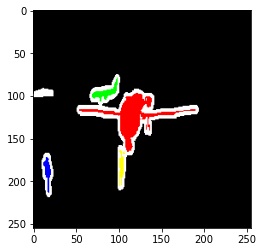

In [9]:
import matplotlib.pyplot as plt

plt.imshow(seg_image)

In [13]:
import numpy as np
import cv2

def _generate_mask_from_segmentation(segmentation_image):
    print(segmentation_image.shape)
    unique_values = np.unique(segmentation_image.flatten())
    print(unique_values)
    sorted_values = np.sort(unique_values)
    sorted_values = sorted_values[1:]
    print(sorted_values)
    sorted_values[::-1].sort()
    sorted_values = sorted_values[1:]
    selected_value = np.random.choice(sorted_values)
    print(selected_value)

    segmentation_mask = (segmentation_image == selected_value).astype(np.float32)
    return segmentation_mask

In [20]:
seg_image = cv2.cvtColor(seg_image, cv2.COLOR_RGB2GRAY)
seg_image = seg_image.astype(np.uint8)

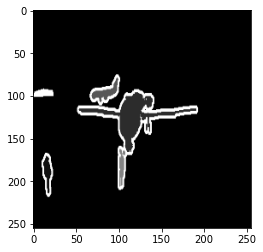

In [22]:
plt.imshow(seg_image, cmap='gray')